## Plots of the results of the benchmarks

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from colour import Color
import math
plt.style.use('seaborn-whitegrid')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.figsize'] = [30, 9]
plt.rcParams['legend.fontsize'] = 'medium'

In [2]:
x = [i for i in range(50,10000, 50)]

def read(filename):
    for i in range(1,6):
        name = filename + '_%d'%i + '.txt'
        fname = os.path.join('../test', name)    
        if(i==1):
            mat = np.array([np.loadtxt(fname)])
        else:
            mat = np.concatenate((mat, [np.loadtxt(fname)]), axis=0)
    mat_avg = mat.mean(0)
    mat_std = mat.std(0)
    return mat_avg, mat_std

def plot(l, xlabel):
    for i in l:
        plt.errorbar(x, i[0], yerr=i[1], fmt=i[2], ecolor=i[3], label = i[4]);
        plt.xlabel(xlabel)
        plt.ylabel("Time $\mu$s")
        plt.legend(prop={'size': 20})

label1 = "Number of terms retrieved"
label2 = "Number of posting lists retrieved"
label3 = "Number of terms + posting lists retrieved"

Time to retrieve a term in the dictionary:

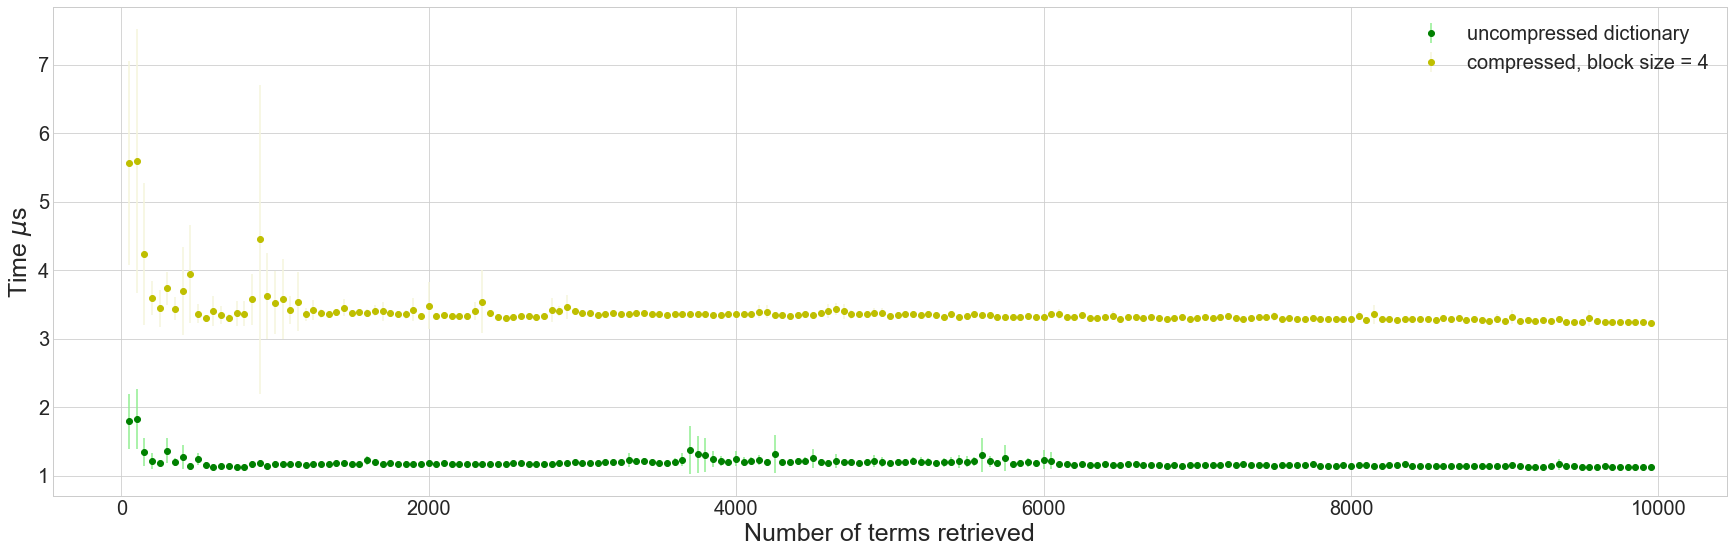

In [3]:
d_avg, d_std = read('dict')
ld = [d_avg, d_std, 'go', 'lightgreen', 'uncompressed dictionary']
cd_avg, cd_std = read('compress_dict')
cdl = [cd_avg, cd_std, 'yo', 'beige', 'compressed, block size = 4']
plot([ld, cdl], label1)

Time to retrieve a term in the compressed dictionary:

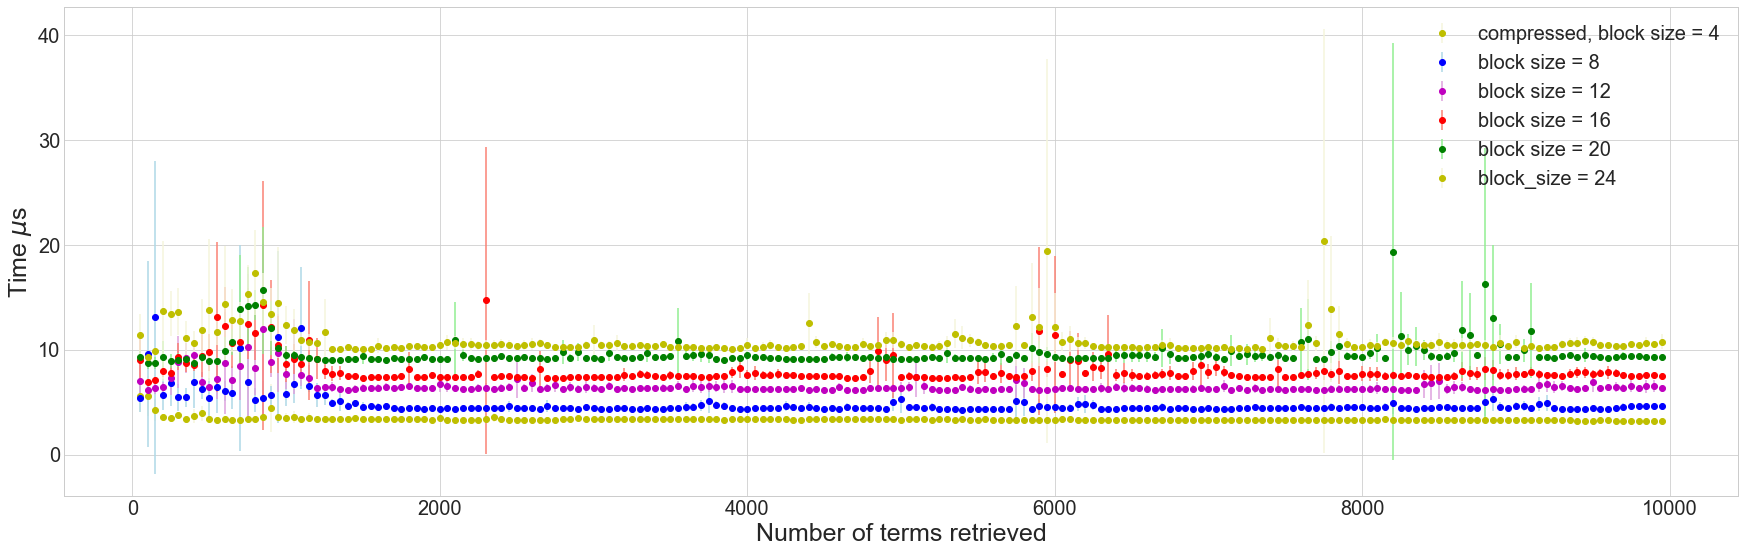

In [4]:
cd_8_avg, cd_8_std = read('compress_8_dict')
cd8l = [cd_8_avg, cd_8_std, 'bo', 'lightblue', 'block size = 8']
cd_12_avg, cd_12_std = read('compress_12_dict')
cd12l = [cd_12_avg, cd_12_std, 'mo', 'plum', 'block size = 12']
cd_16_avg, cd_16_std = read('compress_16_dict')
cd16l = [cd_16_avg, cd_16_std, 'ro', 'salmon', 'block size = 16']
cd_20_avg, cd_20_std = read('compress_20_dict')
cd20l = [cd_20_avg, cd_20_std, 'go', 'lightgreen', 'block size = 20']
cd_24_avg, cd_24_std = read('compress_24_dict')
cd24l = [cd_24_avg, cd_24_std, 'yo', 'beige', 'block_size = 24']

l = [cdl, cd8l, cd12l, cd16l, cd20l, cd24l]
plot(l, label1)

Time to retrieve a posting list:

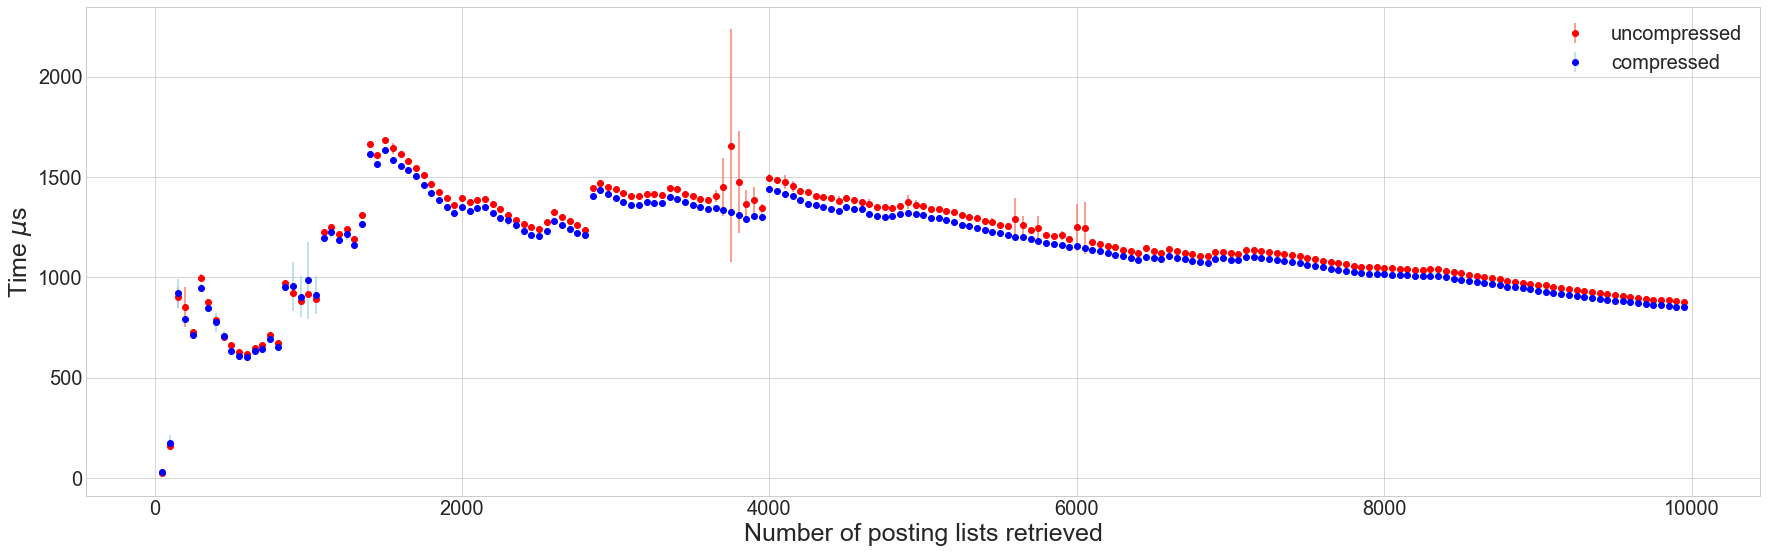

In [5]:
#uncompressed
pl_avg, pl_std = read('post')
pll = [pl_avg, pl_std, 'ro', 'salmon', 'uncompressed']
#compressed
cpl_avg, cpl_std = read('compress_post')
cpll = [cpl_avg, cpl_std, 'bo', 'lightblue', 'compressed']
#plot
pl = [pll, cpll]
plot(pl, label2)

Time to retrieve in the tree:

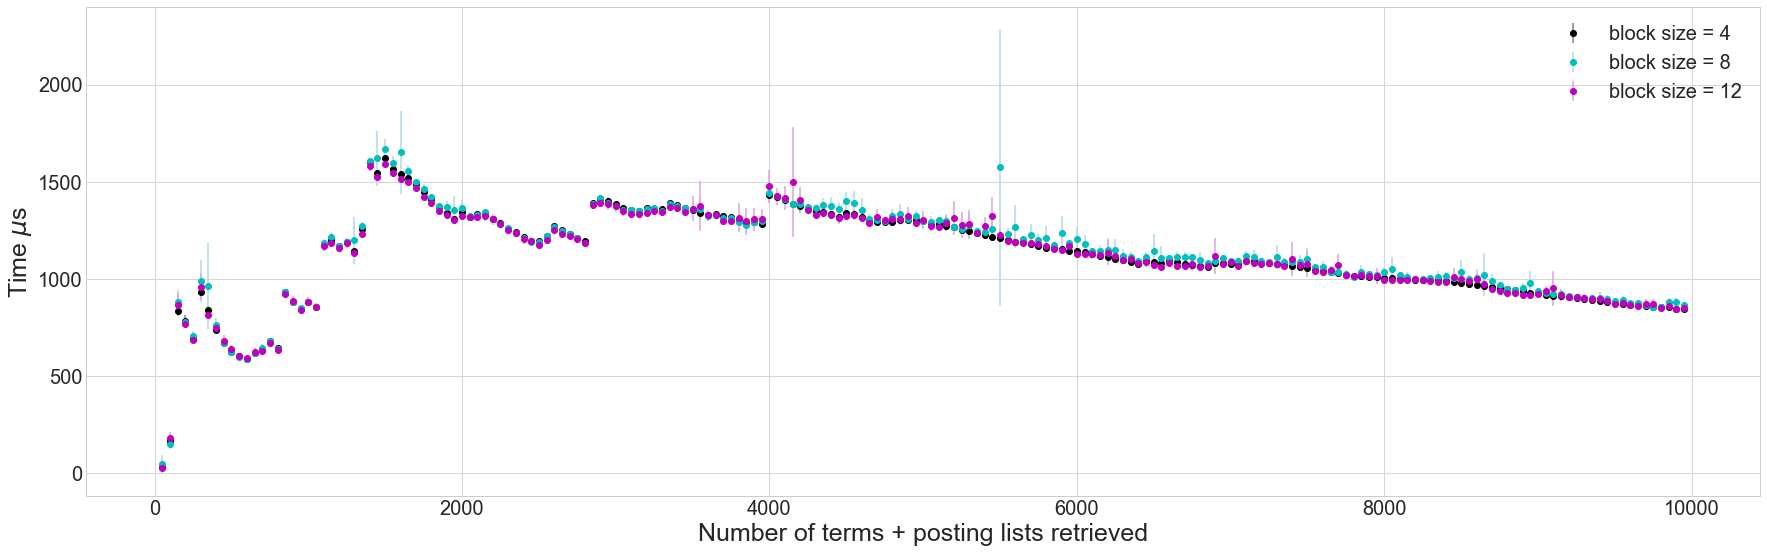

In [6]:
t_avg, t_std = read('tree')
tl = [t_avg, t_std, 'ko', 'grey', 'block size = 4']
t8_avg, t8_std = read('tree_8')
t8l = [t8_avg, t8_std, 'co', 'lightblue', 'block size = 8']
t12_avg, t12_std = read('tree_12')
t12l = [t12_avg, t12_std, 'mo', 'plum', 'block size = 12']

btl = [tl, t8l, t12l] 
plot(btl, label3)

Time to retrieve only terms in the tree:

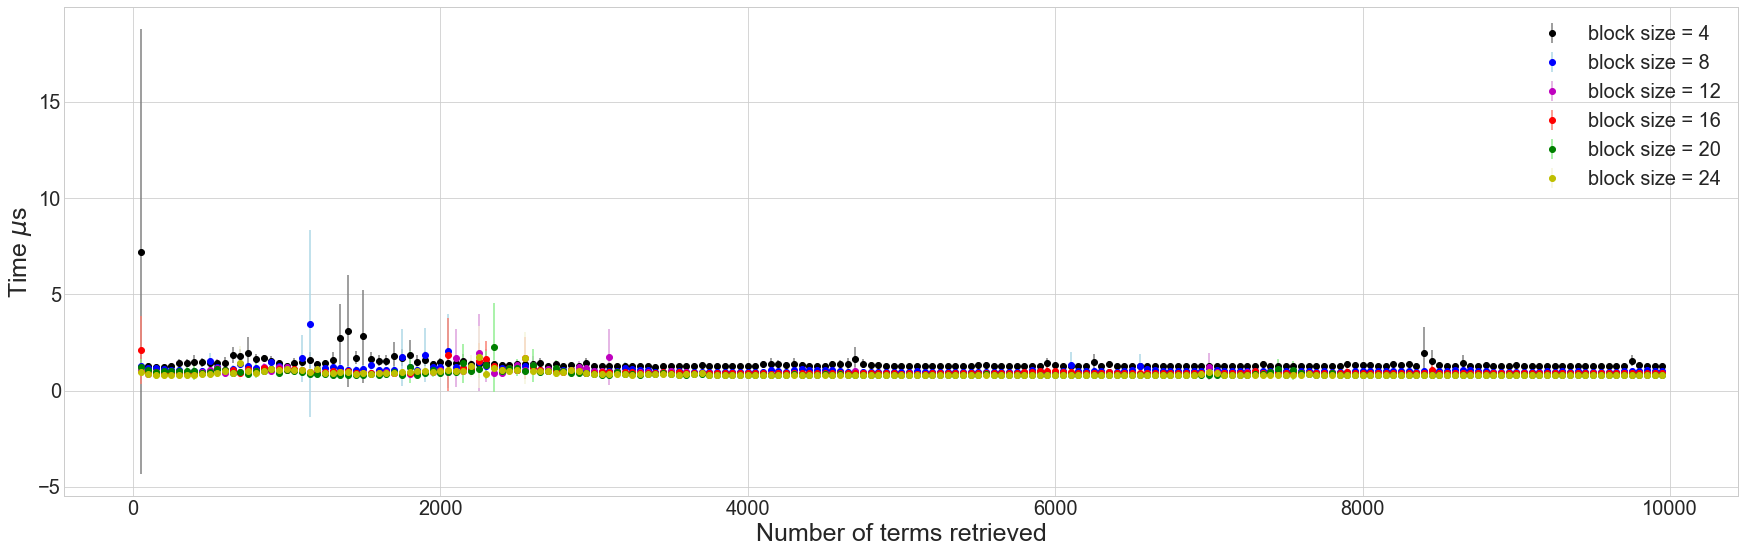

In [7]:
tt_avg, tt_std = read('tree_term')
ttl = [tt_avg, tt_std, 'ko', 'grey', 'block size = 4']
tt8_avg, tt8_std = read('tree_8_term')
tt8l = [tt8_avg, tt8_std, 'bo', 'lightblue', 'block size = 8']
tt12_avg, tt12_std = read('tree_12_term')
tt12l = [tt12_avg, tt12_std, 'mo', 'plum', 'block size = 12']
tt16_avg, tt16_std = read('tree_16_term')
tt16l = [tt16_avg, tt16_std, 'ro', 'salmon', 'block size = 16']
tt20_avg, tt20_std = read('tree_20_term')
tt20l = [tt20_avg, tt20_std, 'go', 'lightgreen', 'block size = 20']
tt24_avg, tt24_std = read('tree_24_term')
tt24l = [tt24_avg, tt24_std, 'yo', 'beige', 'block size = 24']
tt100_avg, tt100_std = read('tree_100')
tt100l = [tt100_avg, tt100_std, 'ro', 'salmon', 'block size = 100']

bttl = [ttl, tt8l, tt12l, tt16l, tt20l, tt24l]
plot(bttl, label1)

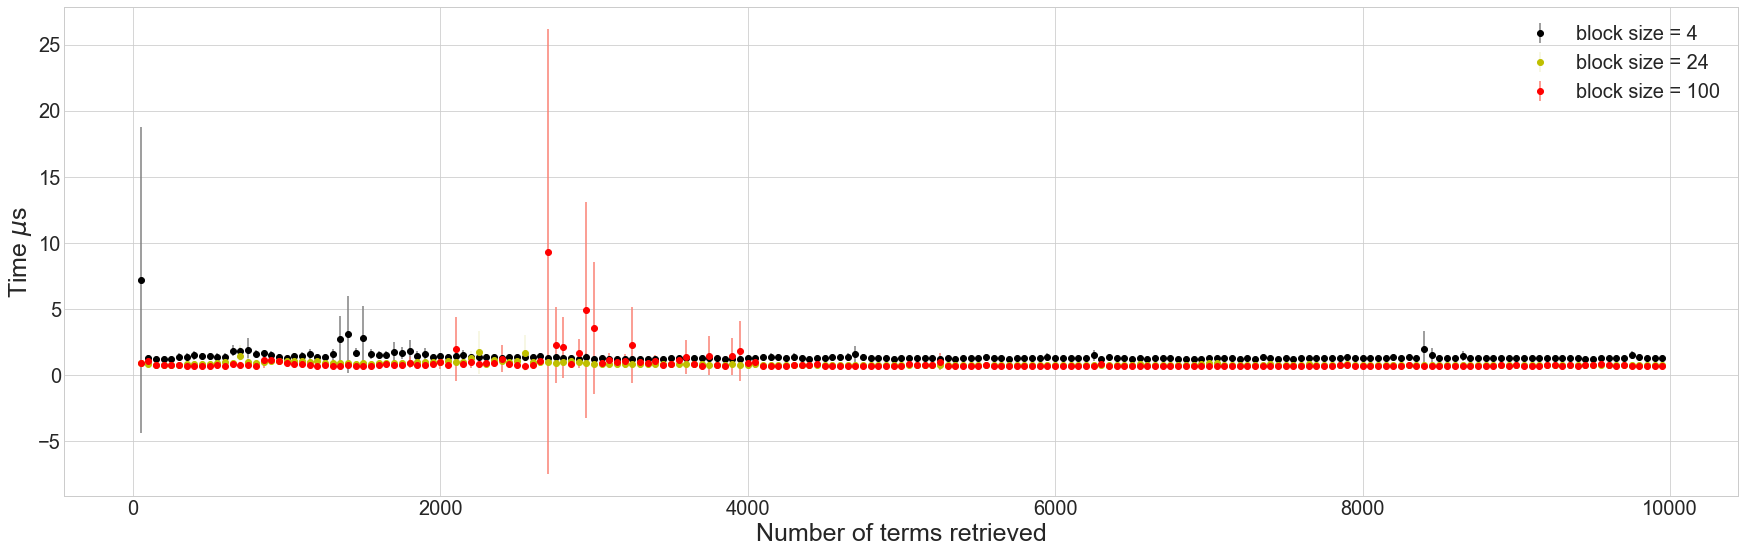

In [8]:
ll = [ttl, tt24l, tt100l]
plot(ll, label1)

## Dimensions

In [9]:
#dictionary
blocks = [4, 8 ,12, 16, 20, 24]
byte = [106958, 100722, 98602, 97505, 96936, 96552]
kilobyte = [107, 101, 99, 98, 97, 97]

non_compressed_dict = [144857, 145] #bytes/kilobytes

#posting list
posting_list = [6160827, 6.2] #bytes/megabytes
pl_compressed = [1362888, 1.4] #bytes/megabytes

In [10]:
def nested_circles(data, labels=None, c=None, ax=None, 
                   cmap=None, norm=None, textkw={}):
    ax = ax or plt.gca()
    data = np.array(data)
    R = np.sqrt(data/data.max())
    p = [plt.Circle((0,r), radius=r) for r in R[::-1]]
    arr = data[::-1] if c is None else np.array(c[::-1])
    col = PatchCollection(p, cmap=cmap, norm=norm, array=arr)

    ax.add_collection(col)
    ax.axis("off")
    ax.set_aspect("equal")
    ax.autoscale()

    if labels is not None:
        kw = dict(color="white", va="center", ha="center")
        kw.update(textkw)
        ax.text(0, R[0], labels[0], **kw)
        for i in range(1, len(R)):
            ax.text(0, R[i]+R[i-1], labels[i], **kw)
    return col

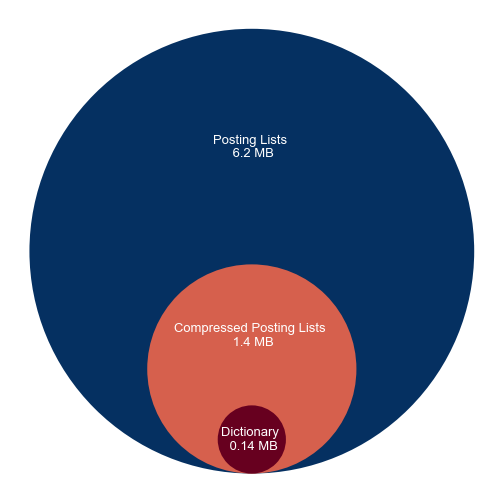

In [19]:
data = [non_compressed_dict[0], pl_compressed[0], posting_list[0]]
labs = ["Dictionary \n 0.14 MB", "Compressed Posting Lists \n 1.4 MB", "Posting Lists \n 6.2 MB"]
l = list(labs)
nested_circles(data, labels=l, cmap='RdBu', textkw=dict(fontsize=13))
plt.show()

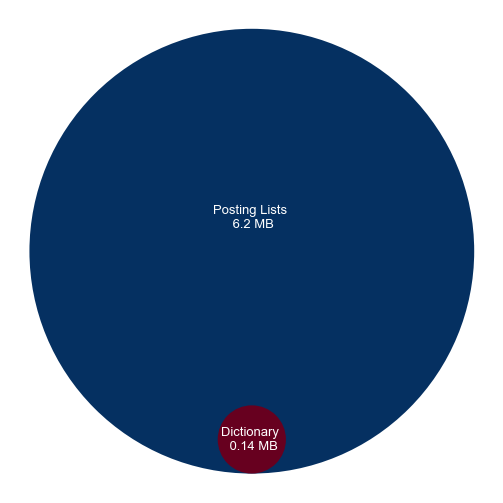

In [18]:
data = [non_compressed_dict[0], posting_list[0]]
labs = ["Dictionary \n 0.14 MB","Posting Lists \n 6.2 MB"]
l = list(labs)
nested_circles(data, labels=l, cmap='RdBu', textkw=dict(fontsize=13))
plt.show()

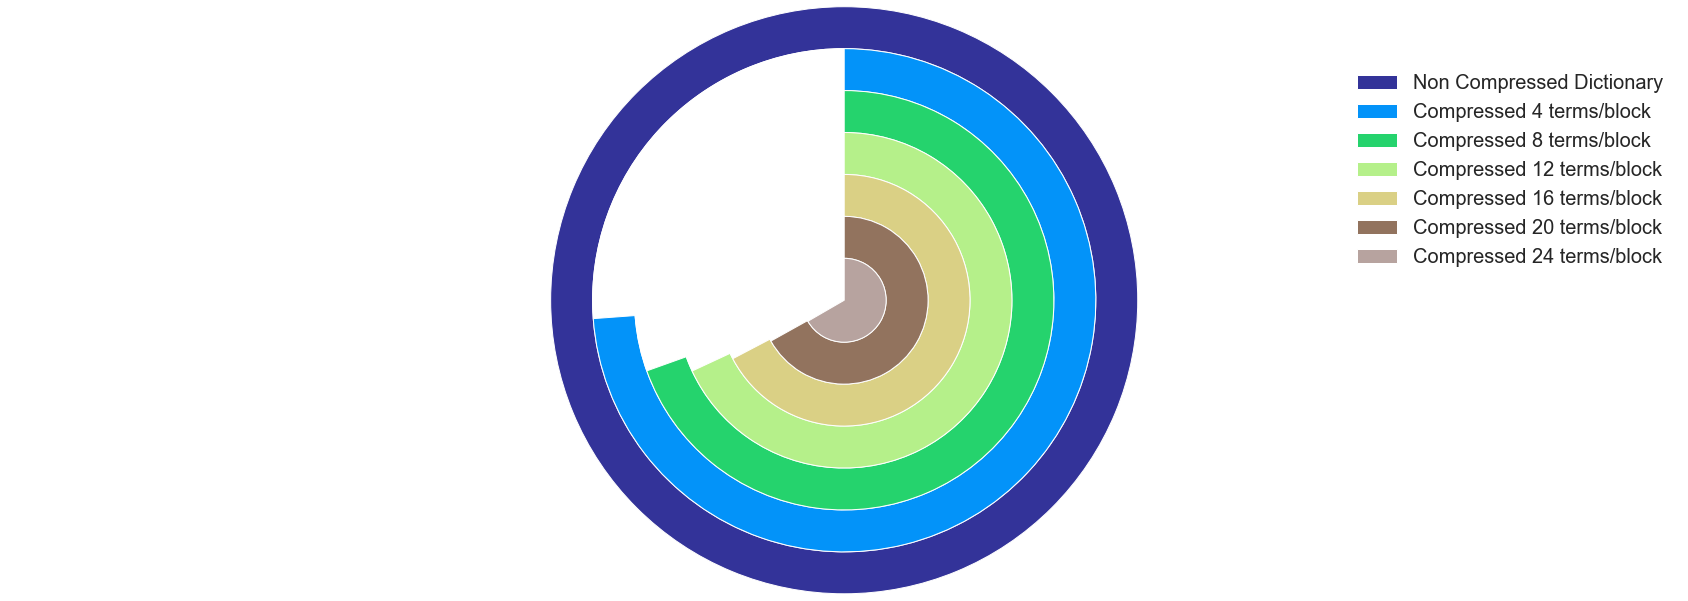

In [15]:
lab = ["Non Compressed Dictionary", "Compressed 4 terms/block", "Compressed 8 terms/block", 
        "Compressed 12 terms/block" , "Compressed 16 terms/block", "Compressed 20 terms/block", "Compressed 24 terms/block"]
labels=list(lab)

dim_dict = [non_compressed_dict[0]] + byte
n = len(dim_dict) 


#k = 10**int(log10(max(dim_dict)))
m =  max(dim_dict)
#m = k * (1 + max(dim_dict) // k)
r = 1.5 #radius of the chart
w = r/n #width of each ring
cols = [cm.terrain(i/n) for i in range(n)] #colors

fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    innerring, _ = ax.pie([m-dim_dict[i], dim_dict[i]], radius = r - i*w, startangle=90,
                          labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors=["white",cols[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend(fontsize=20)
plt.show()

/Library/Python/3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Python/3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Python/3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

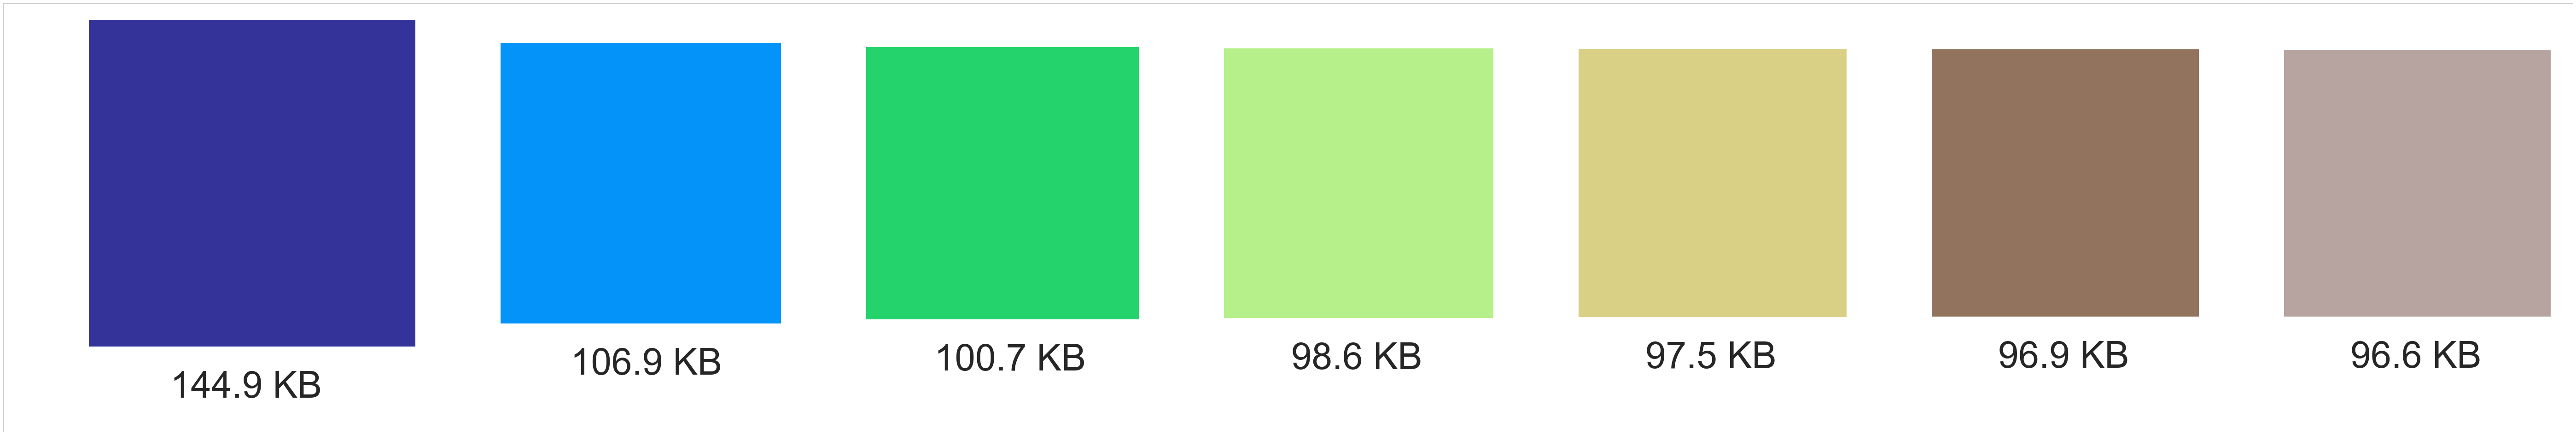

In [14]:
#cols = [cm.Greens(i/(n)) for i in range(n+1)] #colors
side = []
for i in range(len(dim_dict)):
    side.append(math.sqrt(dim_dict[i]))
    
hstart = []
for i in range(len(dim_dict)):
    if(i==0):
        hstart.append(100)
    else:
        hstart.append(hstart[i-1]+100+side[i-1])

vstart = []
for i in range(len(dim_dict)):
    if(i==0):
        vstart.append(100)
    else:
        vstart.append(vstart[i-1]+(side[i-1]-side[i])/2)
        
lab = ["144857B", "106958B", "100722B", "98602B", "97505B", "96936B", "96552B"]
lab2 = ["144.9 KB", "106.9 KB", "100.7 KB", "98.6 KB", "97.5 KB", "96.9 KB", "96.6 KB"]

hstart1 = []
vstart1 = []
hstart2 = []
vstart2 = []
for i in range(len(lab)):
    hstart1.append(1.5*hstart[i] - (len(lab[i])/2))
    vstart1.append(vstart[i]-40)
    hstart2.append(hstart[i]+side[i]/4)
    vstart2.append(vstart1[i]-20)

#proportional area chart


ylims = (0,500)
xlims = (0,3000)
fig = plt.figure(figsize=(100,50))
ax1 = fig.add_subplot(111, aspect='equal')
ax1.add_patch(patches.Rectangle((hstart[0], vstart[0]), side[0], side[0], color=cols[0]))
ax2 = fig.add_subplot(111, aspect='equal')
ax2.add_patch(patches.Rectangle((hstart[1], vstart[1]), side[1], side[1], color=cols[1]))
ax3 = fig.add_subplot(111, aspect='equal')
ax3.add_patch(patches.Rectangle((hstart[2], vstart[2]), side[2], side[2], color=cols[2]))
ax4 = fig.add_subplot(111, aspect='equal')
ax4.add_patch(patches.Rectangle((hstart[3], vstart[3]), side[3], side[3], color=cols[3]))
ax5 = fig.add_subplot(111, aspect='equal')
ax5.add_patch(patches.Rectangle((hstart[4], vstart[4]), side[4], side[4], color=cols[4]))
ax6 = fig.add_subplot(111, aspect='equal')
ax6.add_patch(patches.Rectangle((hstart[5], vstart[5]), side[5], side[5], color=cols[5]))
ax7 = fig.add_subplot(111, aspect='equal')
ax7.grid(False)
ax7.set_xticks([])
ax7.set_yticks([])
ax7.add_patch(patches.Rectangle((hstart[6], vstart[6]), side[6], side[6], color=cols[6]))
ax7.set_facecolor('white')
#plt.text(hstart1[0], vstart1[0], lab[0], fontsize=80)
for i in range(len(hstart2)):
    plt.text(hstart2[i], vstart2[i], lab2[i], fontsize=80)
plt.ylim(ylims)
plt.xlim(xlims);

## Queries

In [27]:
#dictionary - postings 
dp = [3710.9, 3676.35, 3679.78, 3869.83, 3687.61]
dp = np.array(dp)
dp_avg = dp.mean()
dp_std = dp.std()
#compressed dict - postings 
cdp = [3865.23, 3751.04, 3727.47, 3682.03, 3680.06]
cdp = np.array(cdp)
cdp_avg = cdp.mean()
cdp_std = cdp.std()
#dictionary - compressed postings
dcp = [3725.61, 3573.53, 3576.32, 3574.6, 3582.38]
dcp = np.array(dcp)
dcp_avg = dcp.mean()
dcp_std = dcp.std()
#compressed dictionary - compressed postings 
cdcp = [3559.62, 3542.12, 3543.68, 3541.09, 3540.53]
cdcp = np.array(cdcp)
cdcp_avg = cdcp.mean()
cdcp_std = cdcp.std()
#tree
tree = [3532.31, 3537.2, 3532.12, 3532.21, 3533.04]
tree = np.array(tree)
tree_avg = tree.mean()
tree_std = tree.std()

In [45]:
y = [cdp_avg, dp_avg, dcp_avg, cdcp_avg, tree_avg]
x = np.arange(len(y))
err = [cdp_std, dp_std, dcp_std, cdcp_std, tree_std]
labels = ["Compressed Dict. \n Uncompressed Post.", "Uncompressed Dict. \n Uncompressed Post.", 
          "Uncompressed Dict. \n Compressed Post.", "Compressed Dict. \n Compressed Post.", "B+Tree"]

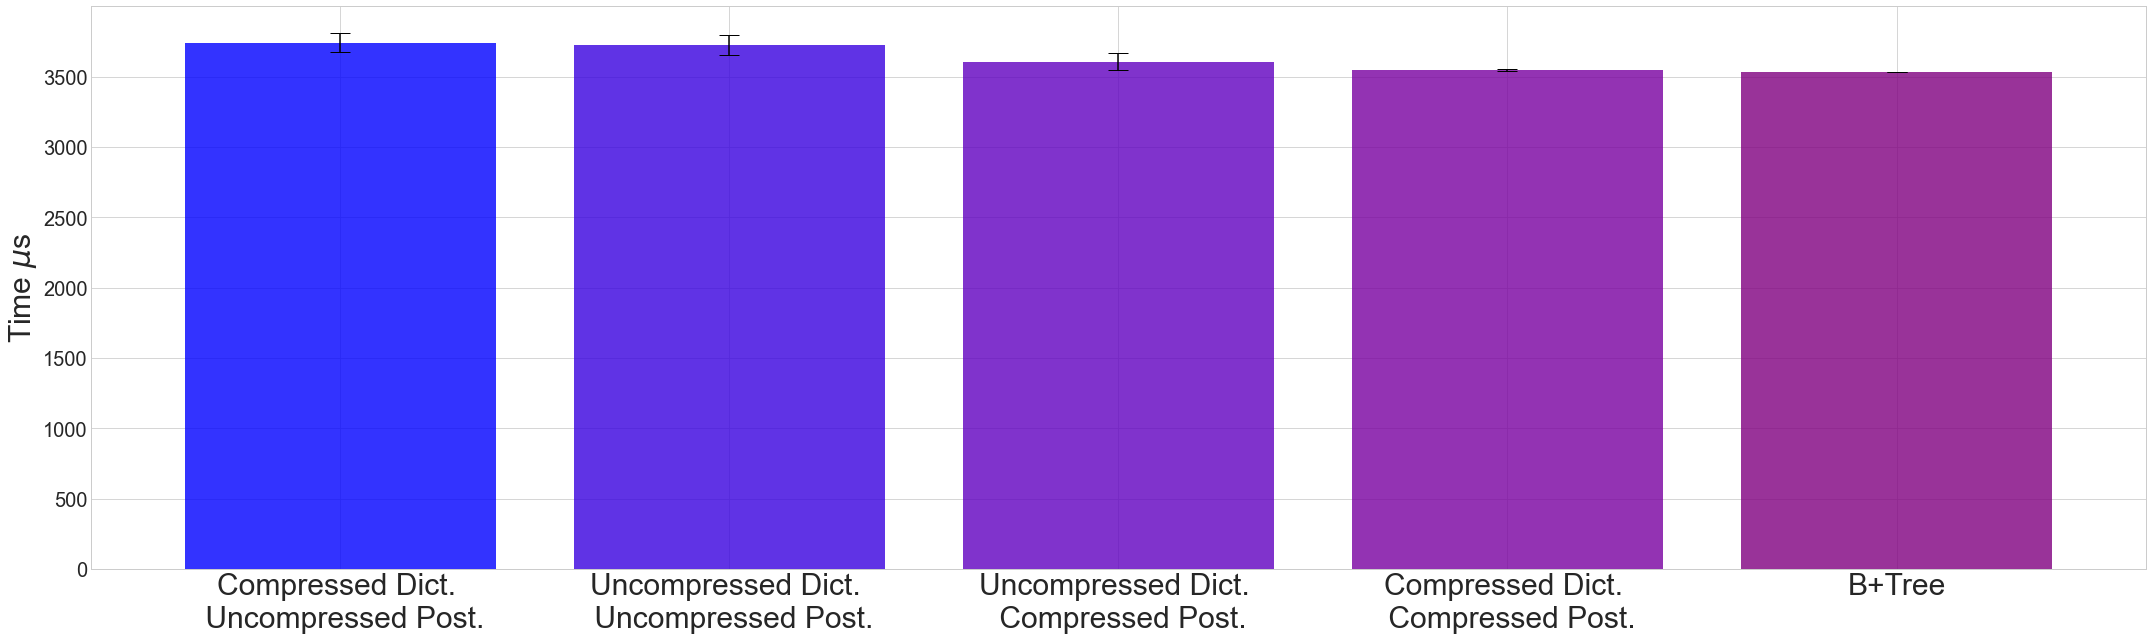

In [53]:
blue = Color("Blue")
colors = list(blue.range_to(Color("Purple"),5))
colors = [color.rgb for color in colors]

fig, ax = plt.subplots()
ax.bar(x, y, yerr=err, align='center', alpha=0.8, ecolor='black', color=colors, capsize=10)
ax.set_ylabel('Time $\mu$s', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()